## Principal Component Analysis

- reference: https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/
- https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

PCA는 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법입니다. 이를 그림(출처)으로 나타내면 아래와 같습니다. 2차원 공간에 있는 데이터들이 하나의 주성분(PC1)을 새로운 기저로 선형변환된 걸 확인할 수 있습니다. 여기에서 핑크색 표시가 돼 있는 사선축이 원 데이터의 분산을 최대한 보존하는(=데이터가 가장 많이 흩뿌려져 있는) 새 기저입니다. PCA의 목적은 바로 이런 축을 찾는 데 있습니다.

![image](http://i.imgur.com/Uv2dlsH.gif)

 <span style="color:red">**위의 그림에서 볼 수 있듯이 분산을 최대화 한다는 의미는 더 낮은 차원으로 데이터를 mapping할 때, 가장 작은 정보 손실을 가지게 한다는 것입니다.**</span>

- 데이터 분산이 최소화되면, 데이터간 중복되는 지점이 많아져 구분하기 힘들다.

### <span style="color:blue">PCA는 feature extraction!</span>

feature extraction은 기존의 변수를 조합해 새로운 변수를 만들어내는 기법이다. PCA에서는 **선형결합(linear composition)** 을 이용하여 새로운 변수를 만들어냅니다.


$$
\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n = observations.
$$

예를 들어, 변수가 p개, 관측치가 n개 있는 데이터 X(p * n)로 새로운 변수 z를 아래와 같이 만드는 과정으로 이해하는 것이 좋을 것 같습니다.
z는 위에서 언급했듯이 **linear composition**을 이용한 새로운 변수입니다.


$$
\begin{align*}
\overrightarrow { { z }_{ 1 } } &={ \alpha  }_{ 11 }\overrightarrow { { x }_{ 1 } } +{ \alpha  }_{ 12 }\overrightarrow { { x }_{ 2 } } +...+{ \alpha  }_{ 1p }\overrightarrow { { x }_{ p } } ={ \overrightarrow { { \alpha  }_{ 1 } }  }^{ T }X\\ \overrightarrow { { z }_{ 2 } } &={ \alpha  }_{ 21 }\overrightarrow { { x }_{ 1 } } +{ \alpha  }_{ 22 }\overrightarrow { { x }_{ 2 } } +...+{ \alpha  }_{ 2p }\overrightarrow { { x }_{ p } } ={ \overrightarrow { { \alpha  }_{ 2 } }  }^{ T }X\\ &...\\ \overrightarrow { { z }_{ p } } &={ \alpha  }_{ p1 }\overrightarrow { { x }_{ 1 } } +{ \alpha  }_{ p2 }\overrightarrow { { x }_{ 2 } } +...+{ \alpha  }_{ pp }\overrightarrow { { x }_{ p } } ={ \overrightarrow { { \alpha  }_{ p } }  }^{ T }X
\end{align*}
$$


위와 같은 식의 선형결합은 선형변환으로도 이해할 수 있습니다. 바꿔 말하면 벡터 z_i 는 X를 α_i( p x 1)라는 새로운 축에 사영(projection)시킨 결과물이라는 것이죠. 

$$
Z=\begin{bmatrix} \overrightarrow { { z }_{ 1 } }  \\ \overrightarrow { { z }_{ 2 } }  \\ ... \\ \overrightarrow { { z }_{ p } }  \end{bmatrix}=\begin{bmatrix} { \overrightarrow { { \alpha  }_{ 1 } }  }^{ T }X \\ { \overrightarrow { { \alpha  }_{ 2 } }  }^{ T }X \\ ... \\ { \overrightarrow { { \alpha  }_{ p } }  }^{ T }X \end{bmatrix}=\begin{bmatrix} { \overrightarrow { { \alpha  }_{ 1 } }  }^{ T } \\ { \overrightarrow { { \alpha  }_{ 2 } }  }^{ T } \\ ... \\ { \overrightarrow { { \alpha  }_{ p } }  }^{ T } \end{bmatrix}X={ A  }^{ T }X
$$

### <span style="color:blue">PCA objective and solution</span>

위에서 언급했듯이, PCA는 mapping되는 차원에서 분산이 최대화가 되는 vector를 찾아야한다. 이를 수학적으로 나타내면 다음과 같다.

**PCA objective**
$$
\begin{align*}
\max _{ \alpha  }{ \{ Var(Z)\}  } &=\max _{ \alpha  }{ \{ Var({ \overrightarrow { \alpha  }  }^{ T }X)\}  } \\ &=\max _{ \alpha  }{ \{ { \overrightarrow { \alpha  }  }^{ T }Var(X)\overrightarrow { \alpha  } \}  } \\ &=\max _{ \alpha  }{ \{ { \overrightarrow { \alpha  }  }^{ T }\Sigma \overrightarrow { \alpha  } \}  }
\end{align*}
$$

- 참고: 전체 집단에 같은 값 a를 곱하면 분산은 $a^2$배가 된다.
![var](https://wikimedia.org/api/rest_v1/media/math/render/svg/6095ed89cb8edfc565c8386c746652dd2b69f000)


**constraint**

분산을 최대화하기 위해서는 alpha를 무한정 키우면 된다. 이런 상황을 제어하기 위해서 아래와 같은 constraint를 부여한다.

$$
\left\| \alpha  \right\| ={ \overrightarrow { \alpha  }  }^{ T }\overrightarrow { \alpha  } =1
$$


PCA objective를 해결하기 위해서는 **라그랑지안 문제**로 변형하여야한다.
참고로 라그랑지안은 objective뿐만 아니라 constraint를 함께 고려하여 해결하는 방법을 의미한다.

$$
\mathbf{L} = {\overrightarrow {\alpha}^{T}}\Sigma {\overrightarrow {\alpha}} - \lambda({\overrightarrow {\alpha}^{T}}\overrightarrow {\alpha} - 1)
$$


최대값을 구하기 위해서 **L**을 미지수 alpha로 미분한 식을 0으로 두어 정리하면 아래와 같습니다.

$$
\begin{align*}
\frac {\partial L}{\partial \overrightarrow {\alpha}} = \Sigma \overrightarrow {\alpha} - \lambda \overrightarrow {\alpha} &=0\\
(\Sigma - \lambda)\overrightarrow {\alpha} &=0
\end{align*}
$$

eigenvector의 정의에 의해 $\alpha$는 데이터의 공분산 $\Sigma$ eigenvector, $\lambda$는 eigenvalue가 됩니다.

그리고 데이터의 공분산 $\Sigma$의 eigenvector를 <span style="color:red">**Principal Component**</span>라고 부릅니다.

### <span style="color: blue">Property of eignevector of covariance matrix  </span>

데이터의 공분산 행렬은 아래와 같이 구합니다.

$$
\Sigma = cov({X}) = \frac {1}{n - 1} {X} ^ {T}{X} \propto {X} ^ {T}{X}
$$

- ${X}$의 차원수가 $p \times n$ 이라면, $\Sigma$는 ${n} \times {n}$크기의 **square matrix**이다.
- ${\Sigma} ^{T} = {\Sigma}$인 **symetric matrix**이다.

열백터가 공분산행렬 $\Sigma$의 고유백터인 행력을 ${A}$, 대각성분이 $\Sigma$의 고유값이고 대각성분을 제외한 요소값이 0인 행렬을 ${\Lambda}$ 이라고 할 때 다음과 같이 식을 쓸 수 있습니다.

$$
\Sigma {A} = \Lambda {A}
$$

$$
\Sigma = {A}{\Lambda}{A} ^ {-1}
$$

$\Sigma$는 대칭행렬이므로 식을 다음과 같이 정리할 수 있습니다.

$$
\begin{align*}
\Sigma ^ {T} = (A ^ {-1}) ^ {T} \Lambda {A}^{T}&=\\
{A}\Lambda{A} ^ {-1} &=
\Sigma
\end{align*}
$$

위에 식에서 알 수 있듯이 ${A} ^ {-1} = A^{T}$ 이며, 이는 ${A}^{T}{A} = {I}$ 임을 알 수 있다.

<span style="color: blue">이를 해석하자면, 공분산행렬 $\Sigma$의 서로다른 고유백터끼리 직교함을 알 수 있다. </span>

- orthogonal한 vector간의 inner product는 0의 값을 가진다.


### <span style="color: blue">Eigenvalue and Variance of new variable </span>

$\Sigma$는 원데이터 X의 공분산 행렬이고, $\Sigma$의 가장 큰 고유값과 고유벡터를 각각 ${\lambda}_1$, ${\alpha}_1$이라고 가정하겠습니다.

${\lambda}_1$, ${\alpha}_1$로 만든 새로운 변수 ${z}_1$을 아래와 같이 쓸 수 있습니다.

$$
{z}_1 = \overrightarrow{\alpha}_1{X}
$$

그리고 ${z}_1$의 분산을 아래와 같이 나타냅니다.

$$
Var({z}_1) = \overrightarrow{\alpha}_1 ^ {T} \Sigma \overrightarrow{\alpha}_1
$$

eigenvector의 정의에 의해서 아래와 같은 식이 성립합니다.

$$
\Sigma \overrightarrow{\alpha}_1 = {\lambda}_1\overrightarrow{\alpha}_1
$$

위의 식을 분산식에 대입하면, 아래와 같이 전개된다.

$$
\begin{align*}
Var({z}_1) = \overrightarrow{\alpha}_1 ^ {T} \Sigma \overrightarrow{\alpha}_1 &=\\
\overrightarrow{\alpha}_1 ^ {T} {\lambda}_1 \overrightarrow{\alpha}_1 &=\\
{\lambda}_1 \overrightarrow{\alpha}_1 ^ {T} \overrightarrow{\alpha}_1 &={\lambda}_1
\end{align*}
$$

**이를 통해 알 수 있듯이 새로운 변수의 분산은 해당 고유백터의 고유값인 것을 알 수 있다.**

## iris example with sklearn package

 - 4개의 feature: sepal length, sepal width, petal length, petal width

In [38]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [39]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [43]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

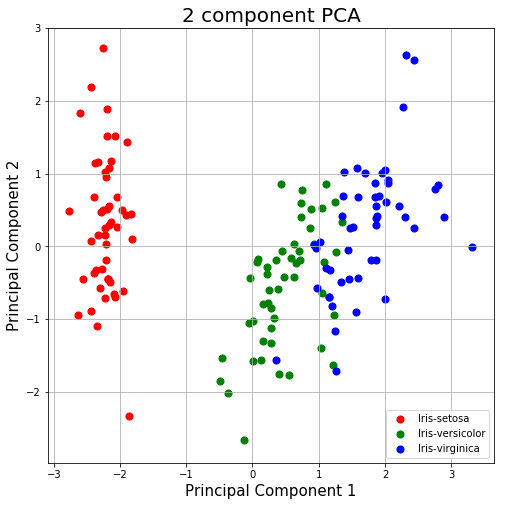

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## iris example with numpy

In [72]:
import numpy as np
def pca(X: np.array):
    """
    Returns
        pca result: np.array. shape of X
        eigen_vals: np.array. column of X
        eigen_vecs: np.array. shape of [ncol, ncol]
    """
    n, m = X.shape
    cov = np.dot(X.T, X) / (n - 1)
    eigen_vals, eigen_vecs = np.linalg.eig(cov)
    print("eigen_vals: {}".format(eigen_vals))
    X_pca = np.dot(X, eigen_vecs)
    return X_pca, eigen_vals, eigen_vecs

In [77]:
result, eigenvals, eigenvecs = pca(x)

principalDf = pd.DataFrame(data = result
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

eigen_vals: [2.93035378 0.92740362 0.14834223 0.02074601]


In [95]:
finalDf.loc[indicesToKeep, 'pc1'].shape

(50,)

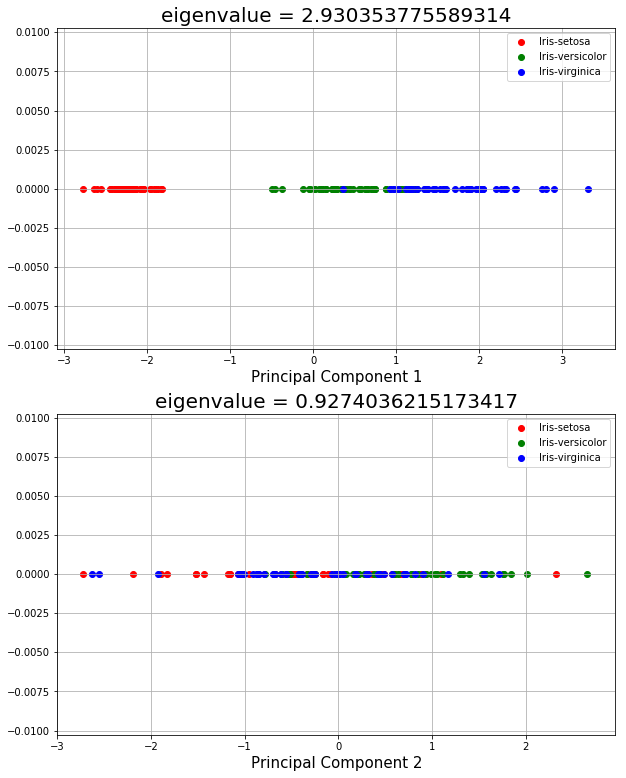

In [96]:
fig = plt.figure(figsize = (10,13))

ax1 = fig.add_subplot(2,1,1) 
ax2 = fig.add_subplot(2,1,2) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_title('eigenvalue = {}'.format(eigenvals[0]), fontsize = 20)


ax2.set_xlabel('Principal Component 2', fontsize = 15)
ax2.set_title('eigenvalue = {}'.format(eigenvals[1]), fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'pc1'], [0] * finalDf.loc[indicesToKeep, 'pc1'].shape[0], c = color)
    ax2.scatter(finalDf.loc[indicesToKeep, 'pc2'], [0] * finalDf.loc[indicesToKeep, 'pc1'].shape[0], c = color)
ax1.legend(targets)
ax1.grid()
ax2.legend(targets)
ax2.grid()

위의 결과에서 알 수 있듯이 eigen value는 새로운 변수의 분산을 나타낸다. 분산이 클 수록 원래 데이터의 정보를 더 잘 잡아낸다.